In [ ]:
path='drive/My Drive/dataset'
tmpdata=[]
label=[]
with open(path+'/data.txt') as file:
    line = file.readline()[:-1] # always trim newline
    while line:
       tmpdata.append(line.split()[0])
       label.append(int(line.split()[1]))
       line = file.readline()[:-1]


In [ ]:
#extract 100000 true and false labels
data=[]
target=[]
un=0
zero=0
for i in range(0,len(label),1):
  if label[i] == 1 and un<=50000:
    un+=1
    data.append(tmpdata[i])
    target.append(label[i])
for i in range(0,len(label),1):
  if label[i] == 0 and zero<=50000:
    zero+=1
    data.append(tmpdata[i])
    target.append(label[i]) 

In [ ]:
len(data),len(target)

(100002, 100002)

In [ ]:
%%time
#this is a separate file were we call the feature extraction 
import numpy as np
import pandas as pd
from collections import defaultdict,Counter
codon = {                   'GCA':0, 'GCC':0, 'GCG':0, 'GCT':0,
                            'TGC':0, 'TGT':0, 'GAC':0, 'GAT':0, 
                            'GAA':0, 'GAG':0, 'TTC':0, 'TTT':0,
                            'GGA':0, 'GGC':0, 'GGG':0, 'GGT':0,
                            'CAC':0, 'CAT':0, 'ATA':0, 'ATC':0, 
                            'ATT':0, 'AAA':0, 'AAG':0, 'CTT':0,
                            'TTA':0, 'TTG':0, 
                            'CTA':0, 'CTC':0, 'CTG':0, 'ATG':0,  
                            'AAC':0, 'AAT':0, 'CCA':0, 'CCC':0,
                            'CCG':0, 'CCT':0, 'CAA':0, 'CAG':0, 
                            'CGA':0, 'CGC':0, 'CGG':0, 'CGT':0, 
                            'AGA':0, 'AGG':0, 'AGC':0, 'AGT':0,   
                            'TCA':0, 'TCC':0, 'TCG':0, 'TCT':0, 
                            'ACA':0, 'ACC':0, 'ACG':0, 'ACT':0, 
                            'GTA':0, 'GTC':0, 'GTG':0, 'GTT':0, 
                            'TGG':0, 'TAT':0, 'TAC':0, 'TAA':0, 
                            'TAG':0, 'TGA':0, 
                            } 

Nuc_tolist = list(codon) 
dictocodant={"".join([x ,y]):0  for x in Nuc_tolist for y in Nuc_tolist}
def initiationMatrix():
    return [monocodon for monocodon in codon.keys()] + [dictocodon  for dictocodon in dictocodant.keys()]
def extractionOfFeature(orf):
    lenghtOrf=len(orf)
    codons=dict(codon)
    dictocodant_conbinition = dict(dictocodant)
    orfFeatures= [] 
    for cod in range (0,lenghtOrf,1): 
      if all(elem in ["A","T","C","G"]  for elem in list(orf[cod])):
    #------------------monocodant---------------------------------------------------
          codons[orf[cod]]+=1/lenghtOrf
      #----------------------dictocodant ---------------------------------------------
          if cod< lenghtOrf-1 and all(elem in ["A","T","C","G"]  for elem in list(orf[cod+1])): 
              dictocodant_conbinition[orf[cod]+orf[cod+1]]+=1/(lenghtOrf-1)      
    #-------------------------------------------------------------------------------------- 
    orfFeatures=list(codons.values())+list(dictocodant_conbinition.values())
    return orfFeatures                         
    #----------------------------------------------------------------------------------------------------------

        
 

CPU times: user 875 µs, sys: 0 ns, total: 875 µs
Wall time: 882 µs


In [ ]:
featuresExtraction=[]
featuresExtraction.append(initiationMatrix())
for orf in data:
  tmpOrf=[orf[i:i+3] for i in range(0,len(orf)-3,1) ]
  featuresExtraction.append(extractionOfFeature(tmpOrf))


In [ ]:
import pandas as pd
data = pd.DataFrame(featuresExtraction[1:], columns = featuresExtraction[0])
data['target'] = target


In [ ]:
X = data.drop("target",axis=1)   #Feature Matrix
y = data["target"] 

In [ ]:
X

,GCA,GCC,GCG,GCT,TGC,TGT,GAC,GAT,GAA,GAG,TTC,TTT,GGA,GGC,GGG,GGT,CAC,CAT,ATA,ATC,ATT,AAA,AAG,CTT,TTA,TTG,CTA,CTC,CTG,ATG,AAC,AAT,CCA,CCC,CCG,CCT,CAA,CAG,CGA,CGC,...,TGATTA,TGATTG,TGACTA,TGACTC,TGACTG,TGAATG,TGAAAC,TGAAAT,TGACCA,TGACCC,TGACCG,TGACCT,TGACAA,TGACAG,TGACGA,TGACGC,TGACGG,TGACGT,TGAAGA,TGAAGG,TGAAGC,TGAAGT,TGATCA,TGATCC,TGATCG,TGATCT,TGAACA,TGAACC,TGAACG,TGAACT,TGAGTA,TGAGTC,TGAGTG,TGAGTT,TGATGG,TGATAT,TGATAC,TGATAA,TGATAG,TGATGA
0,0.000000,0.016667,0.000000,0.016667,0.000000,0.000000,0.016667,0.016667,0.083333,0.016667,0.000000,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.033333,0.016667,0.033333,0.000000,0.116667,0.033333,0.000000,0.000000,0.000000,0.016667,0.016667,0.000000,0.050000,0.033333,0.050000,0.016667,0.000000,0.016667,0.000000,0.016667,0.033333,0.016667,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.000000,0.000000,0.008130,0.008130,0.032520,0.000000,0.008130,0.040650,0.016260,0.032520,0.040650,0.040650,0.000000,0.008130,0.040650,0.000000,0.008130,0.024390,0.008130,0.008130,0.048780,0.024390,0.040650,0.016260,0.024390,0.000000,0.024390,0.008130,0.032520,0.032520,0.016260,0.000000,0.000000,0.000000,0.008130,0.024390,0.008130,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.016260,0.000000,0.000000,0.008130,0.008130,0.024390,0.024390,0.008130,0.048780,0.000000,0.016260,0.016260,0.024390,0.008130,0.000000,0.000000,0.008130,0.024390,0.024390,0.008130,0.016260,0.032520,0.048780,0.008130,0.008130,0.016260,0.016260,0.040650,0.008130,0.024390,0.024390,0.000000,0.016260,0.024390,0.016260,0.016260,0.008130,0.024390,0.032520,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.016667,0.000000,0.008333,0.000000,0.008333,0.008333,0.000000,0.008333,0.033333,0.025000,0.066667,0.041667,0.033333,0.008333,0.000000,0.025000,0.008333,0.016667,0.025000,0.016667,0.025000,0.016667,0.016667,0.041667,0.008333,0.008333,0.000000,0.000000,0.016667,0.025000,0.016667,0.033333,0.008333,0.000000,0.000000,0.016667,0.025000,0.008333,0.008333,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.100000,0.066667,0.016667,0.000000,0.000000,0.000000,0.016667,0.033333,0.016667,0.033333,0.016667,0.016667,0.016667,0.083333,0.016667,0.000000,0.000000,0.000000,0.000000,0.016667,0.016667,0.033333,0.016667,0.000000,0.000000,0.016667,0.016667,0.016667,0.016667,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,0.011236,0.018727,0.007491,0.011236,0.018727,0.044944,0.007491,0.026217,0.003745,0.011236,0.037453,0.022472,0.011236,0.018727,0.007491,0.014981,0.011236,0.014981,0.003745,0.029963,0.018727,0.000000,0.007491,0.044944,0.018727,0.033708,0.014981,0.022472,0.037453,0.026217,0.003745,0.007491,0.000000,0.007491,0.007491,0.041199,0.007491,0.000000,0.011236,0.007491,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99998,0.028169,0.009390,0.009390,0.018779,0.037559,0.014085,0.009390,0.018779,0.004695,0.009390,0.037559,0.014085,0.009390,0.014085,0.014085,0.004695,0.004695,0.023474,0.000000,0.014085,0.028169,0.004695,0.014085,0.023474,0.004695,0.018779,0.004695,0.061033,0.023474,0.023474,0.023474,0.009390,0.004695,0.018779,0.004695,0.070423,0.042254,0.009390,0.009390,0.014085,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99999,0.005291,0.021164,0.005291,0.015873,0.031746,0.026455,0.010582,0.026455,0.005291,0.021164,0

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((70001, 4160), (30001, 4160))

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
X_train_filter=constant_filter.transform(X_train)
X_test_filter=constant_filter.transform(X_test)

In [ ]:
X_train_filter.shape

(70001, 320)

In [ ]:
X_train_filter=pd.DataFrame(X_train_filter)
X_test_filter=pd.DataFrame(X_test_filter)

In [ ]:
X_train_filter

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319
0,0.000000,0.049383,0.012346,0.037037,0.012346,0.012346,0.000000,0.024691,0.024691,0.012346,0.000000,0.012346,0.012346,0.049383,0.012346,0.012346,0.012346,0.000000,0.024691,0.012346,0.000000,0.012346,0.012346,0.037037,0.012346,0.037037,0.000000,0.012346,0.012346,0.012346,0.000000,0.012346,0.024691,0.074074,0.024691,0.012346,0.000000,0.012346,0.024691,0.012346,...,0.012500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.012500,0.012500,0.025000,0.000000,0.012500,0.012500,0.000000,0.000000,0.000000,0.000000,0.000000,0.012500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012500,0.012500,0.000000,0.000000,0.000000,0.012500,0.012500
1,0.015873,0.007937,0.000000,0.031746,0.007937,0.015873,0.007937,0.000000,0.007937,0.031746,0.007937,0.007937,0.015873,0.015873,0.055556,0.023810,0.007937,0.007937,0.015873,0.023810,0.015873,0.000000,0.000000,0.007937,0.023810,0.000000,0.023810,0.039683,0.015873,0.007937,0.015873,0.000000,0.015873,0.007937,0.023810,0.031746,0.007937,0.015873,0.007937,0.015873,...,0.016000,0.000000,0.000000,0.008000,0.000000,0.000000,0.008000,0.008000,0.000000,0.008000,0.008000,0.008000,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.008000,0.016000,0.016000,0.016000,0.000000,0.000000,0.008000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008000,0.000000,0.008000,0.008000,0.000000,0.000000,0.008000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011905,0.035714,0.035714,0.000000,0.000000,0.011905,0.000000,0.011905,0.023810,0.011905,0.000000,0.035714,0.023810,0.035714,0.047619,0.011905,0.011905,0.047619,0.000000,0.023810,0.000000,0.000000,0.000000,0.059524,0.023810,0.035714,0.023810,0.011905,0.023810,0.035714,0.023810,0.023810,0.000000,...,0.000000,0.000000,0.000000,0.012048,0.000000,0.000000,0.012048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024096,0.012048,0.024096,0.000000,0.000000,0.024096,0.000000,0.000000,0.000000,0.000000,0.012048,0.012048,0.012048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.014493,0.014493,0.000000,0.019324,0.000000,0.019324,0.009662,0.009662,0.014493,0.057971,0.014493,0.004831,0.028986,0.014493,0.043478,0.028986,0.009662,0.038647,0.028986,0.009662,0.009662,0.000000,0.014493,0.024155,0.019324,0.014493,0.004831,0.004831,0.019324,0.024155,0.019324,0.004831,0.019324,0.004831,0.004831,0.009662,0.009662,0.009662,0.009662,0.014493,...,0.009709,0.000000,0.004854,0.000000,0.014563,0.000000,0.004854,0.000000,0.000000,0.000000,0.009709,0.000000,0.004854,0.000000,0.004854,0.004854,0.009709,0.000000,0.004854,0.014563,0.009709,0.009709,0.000000,0.000000,0.009709,0.000000,0.000000,0.004854,0.000000,0.004854,0.004854,0.004854,0.004854,0.000000,0.004854,0.004854,0.004854,0.000000,0.004854,0.009709
4,0.015152,0.000000,0.015152,0.015152,0.030303,0.000000,0.030303,0.000000,0.030303,0.045455,0.015152,0.000000,0.030303,0.015152,0.030303,0.030303,0.015152,0.015152,0.015152,0.000000,0.015152,0.015152,0.000000,0.000000,0.015152,0.000000,0.015152,0.015152,0.015152,0.030303,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.075758,0.000000,0.000000,...,0.015385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015385,0.000000,0.015385,0.000000,0.000000,0.000000,0.000000,0.000000,0.015385,0.000000,0.000000,0.000000,0.015385,0.015385,0.000000,0.000000,0.000000,0.015385,0.000000,0.000000,0.015385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

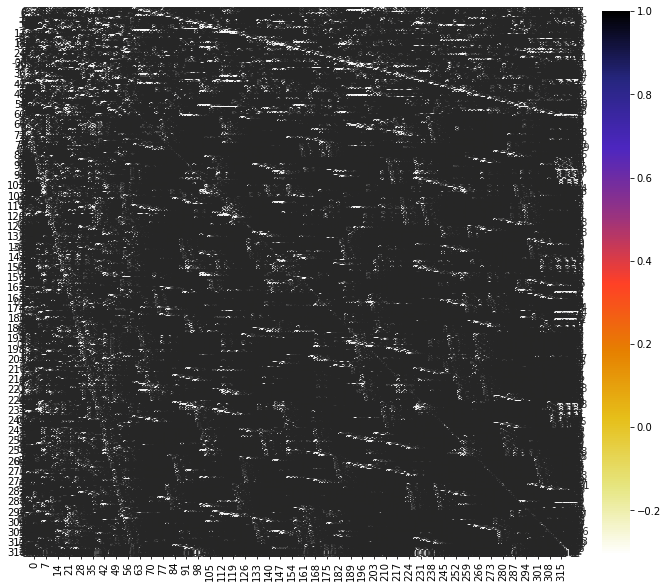

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train_filter.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train_filter, 0.7)
len(set(corr_features))

10

In [ ]:
X_train_filter.drop(corr_features,axis=1)
X_test_filter.drop(corr_features,axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319
0,0.011494,0.000000,0.005747,0.022989,0.017241,0.017241,0.011494,0.040230,0.051724,0.017241,0.022989,0.011494,0.045977,0.005747,0.022989,0.000000,0.005747,0.011494,0.011494,0.011494,0.017241,0.074713,0.040230,0.005747,0.005747,0.017241,0.000000,0.017241,0.022989,0.028736,0.017241,0.011494,0.005747,0.000000,0.005747,0.000000,0.011494,0.022989,0.005747,0.017241,...,0.000000,0.005780,0.000000,0.005780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017341,0.000000,0.011561,0.011561,0.000000,0.000000,0.023121,0.000000,0.000000,0.000000,0.005780,0.000000,0.000000,0.000000,0.005780,0.000000,0.000000,0.005780,0.005780,0.000000,0.000000,0.000000,0.00578,0.000000,0.0,0.000000,0.005780,0.005780,0.011561,0.000000
1,0.000000,0.000000,0.000000,0.027778,0.000000,0.041667,0.000000,0.000000,0.027778,0.013889,0.083333,0.013889,0.000000,0.000000,0.000000,0.027778,0.013889,0.000000,0.000000,0.013889,0.000000,0.069444,0.013889,0.041667,0.000000,0.000000,0.000000,0.027778,0.041667,0.013889,0.027778,0.013889,0.013889,0.027778,0.000000,0.027778,0.027778,0.013889,0.013889,0.013889,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014085,0.000000,0.014085,0.000000,0.000000,0.028169,0.014085,0.000000,0.000000,0.000000,0.000000,0.000000,0.014085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.014085,0.000000
2,0.000000,0.016667,0.000000,0.025000,0.000000,0.008333,0.000000,0.025000,0.025000,0.008333,0.008333,0.008333,0.016667,0.008333,0.016667,0.008333,0.008333,0.016667,0.000000,0.025000,0.016667,0.008333,0.016667,0.016667,0.041667,0.000000,0.008333,0.050000,0.008333,0.041667,0.050000,0.008333,0.016667,0.050000,0.033333,0.016667,0.033333,0.000000,0.016667,0.016667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.008403,0.000000,0.000000,0.000000,0.000000,0.008403,0.000000,0.000000,0.008403,0.008403,0.000000,0.008403,0.008403,0.008403,0.000000,0.000000,0.016807,0.000000,0.008403,0.000000,0.000000,0.000000,0.000000,0.000000,0.008403,0.008403,0.000000,0.00000,0.000000,0.0,0.008403,0.000000,0.000000,0.016807,0.000000
3,0.000000,0.090909,0.000000,0.000000,0.030303,0.015152,0.030303,0.045455,0.030303,0.000000,0.000000,0.015152,0.030303,0.000000,0.000000,0.000000,0.015152,0.030303,0.000000,0.015152,0.030303,0.000000,0.030303,0.015152,0.000000,0.045455,0.000000,0.000000,0.015152,0.060606,0.015152,0.015152,0.075758,0.015152,0.030303,0.015152,0.030303,0.000000,0.015152,0.030303,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015385,0.000000,0.000000,0.000000,0.000000,0.000000,0.015385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.030769,0.015385,0.015385,0.000000
4,0.000000,0.013605,0.013605,0.013605,0.006803,0.006803,0.000000,0.006803,0.081633,0.034014,0.020408,0.013605,0.040816,0.013605,0.006803,0.000000,0.006803,0.013605,0.013605,0.040816,0.006803,0.061224,0.034014,0.013605,0.000000,0.006803,0.000000,0.040816,0.034014,0.006803,0.013605,0.034014,0.013605,0.000000,0.013605,0.006803,0.000000,0.020408,0.020408,0.013605,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006849,0.013699,0.000000,0.006849,0.000000,0.000000,0.027397,0.000000,0.000000,0.000000,0.000000,0.000000,0.006849,0.000000,0.000000,0.000000,0.006849,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.020548,0.006849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_filter, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_filter)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8182727242425253
[[12216  2888]
 [ 2564 12333]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     15104
           1       0.81      0.83      0.82     14897

    accuracy                           0.82     30001
   macro avg       0.82      0.82      0.82     30001
weighted avg       0.82      0.82      0.82     30001

